# FIFA Player Visualization,Analysis and Prediction of 2019 by Using Different Regression

# Overall Rating prediction of FIFA players

# Problem Statement:-

we will build a model that can predict the overall rating of Individual Fifa players based on Several Features(FIFA 19)

# Author:- Hemant Ramkisan Bhutada

In [28]:
# import all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn import metrics

In [4]:
#Read the dataset
dataset = pd.read_csv('data.csv')


In [5]:
# seeing first 5 rows of dataset
dataset.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [6]:
# check the shape of the data
dataset.shape

(18207, 89)

In [7]:
# Summary of numerical variables for  data set
dataset.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [8]:
#check tha datatype of data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [9]:
#check if their is null value
dataset.isnull()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18202,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18203,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18204,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18205,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
#check the sum of all the null values in dataset
dataset.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [12]:
#filling the null value in the dataset
datas=dataset.fillna(0)


In [13]:
#again checking if their is any missing value
datas.describe()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,...,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.110287,2.939529,2.355083,19.481683,...,48.420607,58.493656,47.156973,47.572088,45.541056,16.572417,16.348382,16.189268,16.345691,16.666831
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.397630,0.676679,0.764813,15.960826,...,15.879699,11.810375,20.025458,21.773243,21.389596,17.692536,16.905507,16.502101,17.032944,17.951898
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,26.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,59.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


# Univariate Analysis

[]

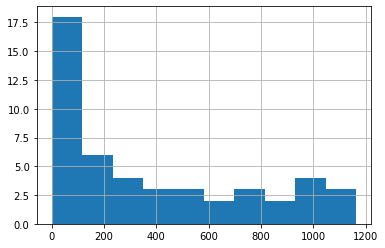

In [15]:
#visiualize the overall rate of the player frequency
datas['Overall'].value_counts().hist().plot()

In [16]:
#checking correlation
datas.corr()

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
Unnamed: 0,1.000000,0.415757,-0.454846,-0.972791,-0.633395,-0.596508,-0.414540,-0.207789,-0.416527,0.209647,...,-0.339819,-0.702345,-0.283456,-0.251353,-0.222981,0.025744,0.024948,0.028539,0.017796,0.023619
ID,0.415757,1.000000,-0.739208,-0.417025,0.047074,-0.231352,-0.353821,-0.076499,-0.058055,0.180602,...,-0.140657,-0.374447,-0.110728,-0.086649,-0.069247,-0.105930,-0.111482,-0.107001,-0.118564,-0.106111
Age,-0.454846,-0.739208,1.000000,0.452350,-0.253312,0.236695,0.251032,0.058586,0.027481,-0.240440,...,0.137857,0.378028,0.141761,0.118997,0.102495,0.101104,0.106229,0.104774,0.116189,0.103137
Overall,-0.972791,-0.417025,0.452350,1.000000,0.660939,0.606960,0.498599,0.213602,0.414026,-0.215479,...,0.341984,0.711350,0.288075,0.254448,0.224815,-0.024374,-0.023450,-0.027729,-0.016088,-0.021732
Potential,-0.633395,0.047074,-0.253312,0.660939,1.000000,0.383727,0.373899,0.166355,0.355177,-0.007087,...,0.227017,0.434343,0.165874,0.146630,0.132096,-0.051490,-0.052650,-0.056998,-0.050588,-0.051402
Special,-0.596508,-0.231352,0.236695,0.606960,0.383727,1.000000,0.290056,0.334616,0.754615,-0.132449,...,0.726279,0.729016,0.558374,0.535982,0.504501,-0.673324,-0.672251,-0.668857,-0.666922,-0.671943
International Reputation,-0.414540,-0.353821,0.251032,0.498599,0.373899,0.290056,1.000000,0.155844,0.226127,-0.067067,...,0.236187,0.412461,0.130557,0.107429,0.093601,0.011388,0.011035,0.007885,0.013907,0.010257
Weak Foot,-0.207789,-0.076499,0.058586,0.213602,0.166355,0.334616,0.155844,1.000000,0.363285,-0.020666,...,0.352944,0.319043,0.090585,0.066396,0.049742,-0.215029,-0.215824,-0.212050,-0.214161,-0.215779
Skill Moves,-0.416527,-0.058055,0.027481,0.414026,0.355177,0.754615,0.226127,0.363285,1.000000,-0.024429,...,0.698117,0.600649,0.255798,0.224331,0.192625,-0.605497,-0.603310,-0.600447,-0.602492,-0.605824
Jersey Number,0.209647,0.180602,-0.240440,-0.215479,-0.007087,-0.132449,-0.067067,-0.020666,-0.024429,1.000000,...,-0.017930,-0.145286,-0.133134,-0.124792,-0.116359,0.007858,0.004820,0.004395,0.000425,0.006315


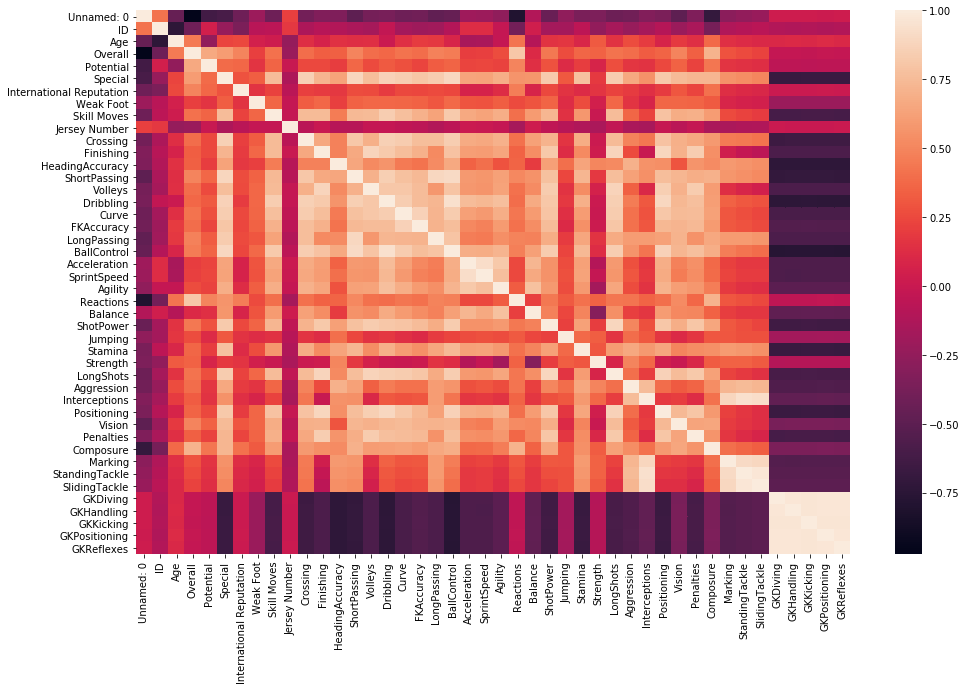

In [29]:
#plotting correlation
cor=datas.corr()
plt.figure(figsize=(16,10))
sns.heatmap(cor)

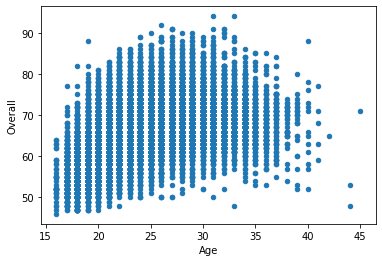

In [19]:
#checling the outliers of the data
datas.plot.scatter('Age','Overall')

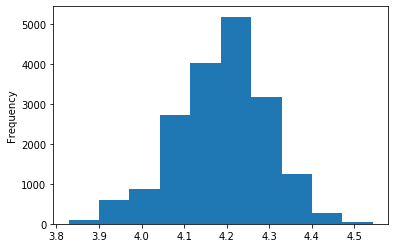

In [25]:
#plotting logarithmic histogram of overalll rating

np.log(datas['Overall']).plot.hist()


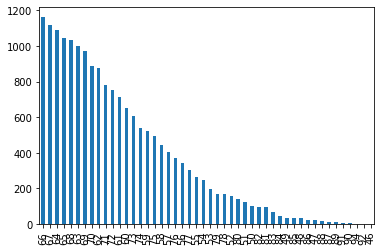

In [30]:
# plotting the bar plot of frequencies
datas['Overall'].value_counts().plot.bar()

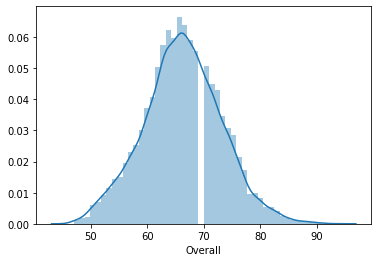

In [33]:
sns.distplot(datas["Overall"])

# Bivariate Analysis

Age      16  17  18  19   20   21   22  23   24   25  ...  35  36  37  38  39  \
Overall                                               ...                       
46        1   0   0   0    0    0    0   0    0    0  ...   0   0   0   0   0   
47        1   2  12   4    1    0    0   0    0    0  ...   0   0   0   0   0   
48        2   8  12   3    3    1    1   0    0    0  ...   0   0   0   0   0   
49        1   9  10   8    6    2    0   0    0    0  ...   0   0   0   0   0   
50        3  20  27  20   12   10    1   1    3    0  ...   0   0   0   0   0   
51        3  22  30  32   14   11    7   3    1    1  ...   0   0   0   0   0   
52        9  17  32  37   17   25    7   7    1    1  ...   0   0   0   0   1   
53        1  17  41  52   28   25   11   9    5    3  ...   1   1   0   0   1   
54        1  26  56  54   38   38   12  11    3    4  ...   1   0   0   1   0   
55        6  13  52  52   36   33   20  16    7   11  ...   0   0   1   0   0   
56        1  16  49  69   62

Text(0, 0.5, 'Age')

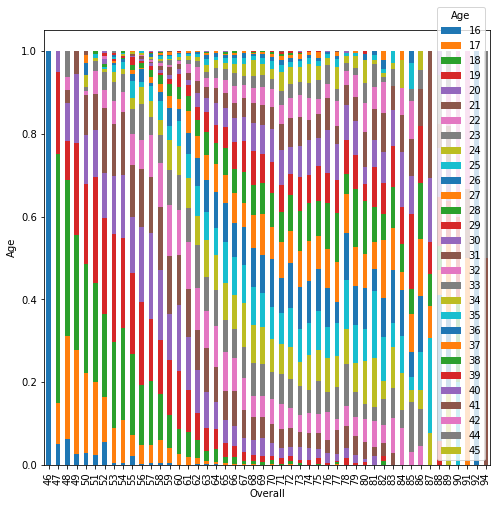

In [35]:
print(pd.crosstab(datas['Overall'],datas['Age']))

job=pd.crosstab(datas['Overall'],datas['Age'])
job.div(job.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('Overall')
plt.ylabel('Age')

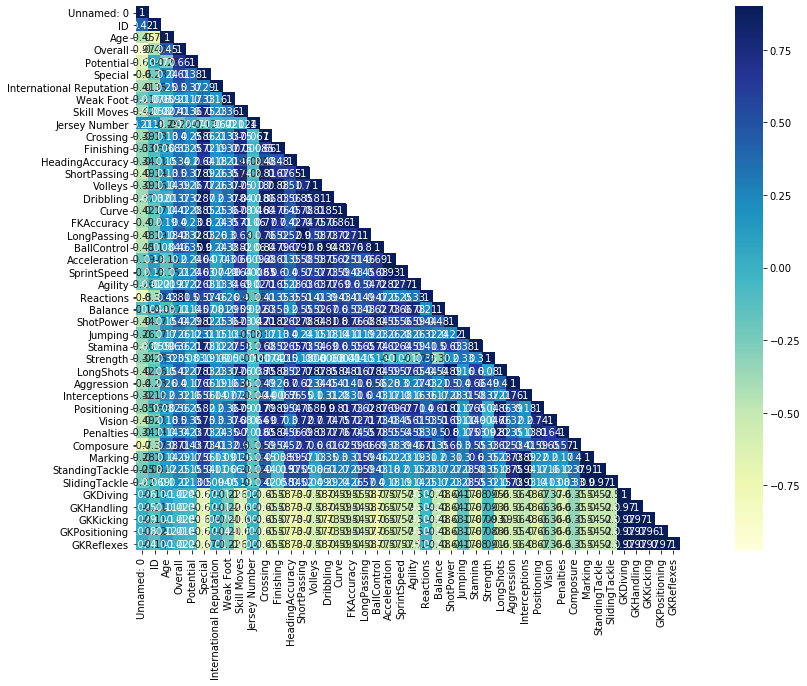

In [37]:
corr = datas.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

# Model Building

In [47]:
X = datas[['Age','Potential','GKHandling','Penalties','Composure','Marking','StandingTackle','SlidingTackle','GKPositioning','GKReflexes']]
y = datas['Overall']
y.shape

(18207,)

In [48]:
X.shape

(18207, 10)

In [49]:
#split the data into training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [50]:
X_train

,Age,Potential,GKHandling,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKPositioning,GKReflexes
4104,37,71,68.0,13.0,55.0,8.0,12.0,11.0,71.0,72.0
1832,20,84,11.0,62.0,78.0,59.0,69.0,66.0,7.0,10.0
11673,19,75,14.0,66.0,45.0,22.0,15.0,17.0,15.0,10.0
9652,24,73,10.0,44.0,50.0,62.0,65.0,62.0,8.0,12.0
11982,32,64,9.0,40.0,60.0,66.0,65.0,56.0,6.0,8.0
...,...,...,...,...,...,...,...,...,...,...
9225,24,70,6.0,32.0,57.0,52.0,65.0,65.0,15.0,16.0
13123,26,65,14.0,73.0,49.0,22.0,20.0,19.0,9.0,7.0
9845,23,75,13.0,62.0,64.0,21.0,41.0,24.0,12.0,14.0
10799,21,77,65.0,16.0,45.0,25.0,10.0,11.0,65.0,67.0


# Simple Linear Regression

Multiple Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
lin_regressor=LinearRegression()
lin_regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
prediction_linear=lin_regressor.predict(X_test)
prediction_linear

array([57.87971768, 60.48851917, 60.34336802, ..., 71.10832277,
       66.17859353, 58.55092899])

In [55]:
#accuracy of testing prediction i.e R-squared
acc_LR=lin_regressor.score(X_test,y_test)
print(acc_LR)

0.8690253202666167


In [56]:
#accuracy of training dataset
lin_regressor.score(X_train,y_train)

0.8679962366375695

In [57]:
print("Linear")
df = pd.DataFrame({'Actual': [y_test], 'Predicted':[prediction_linear]})
df

Linear


,Actual,Predicted
0,15885 58 13652 62 13522 62 7814 6...,"[57.87971768253543, 60.48851917429825, 60.3433..."


# Lasso Regression

In [59]:
from sklearn.linear_model import Lasso
lasso_regressor=Lasso()
lasso_regressor.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
prediction_lasso=lasso_regressor.predict(X_test)
prediction_lasso

array([58.17044086, 60.72557488, 60.7927484 , ..., 70.77534515,
       66.39982473, 59.33805496])

In [61]:
lasso_regressor.score(X_test,y_test)

0.8663369052845002

In [62]:
print("Lasso")
df = pd.DataFrame({'Actual': [y_test], 'Predicted':[prediction_lasso]})
df

Lasso


,Actual,Predicted
0,15885 58 13652 62 13522 62 7814 6...,"[58.1704408645674, 60.72557488126793, 60.79274..."


# Ridge Regression

In [63]:
from sklearn.linear_model import Ridge
ridge_regressor=Ridge()
ridge_regressor.fit(X_train,y_train)


Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [64]:
prediction_ridge=ridge_regressor.predict(X_test)
prediction_ridge

array([57.87975272, 60.48851856, 60.34343217, ..., 71.10831486,
       66.17860334, 58.55096687])

In [65]:
print("Rigde")
df = pd.DataFrame({'Actual': [y_test], 'Predicted':[prediction_ridge]})
df

Rigde


,Actual,Predicted
0,15885 58 13652 62 13522 62 7814 6...,"[57.879752724342666, 60.48851856066237, 60.343..."


In [66]:
ridge_regressor.score(X_test,y_test)

0.8690253888136202